In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# граничные условия для всех данных 
def U0_x(x):
    return 0

In [3]:
# разностная схема
def diff_scheme(l, T, h, ty, f, a, U0_x):
    N = int(l/h) + 1
    M = int(T/ty) + 1

    x = np.linspace(0, l, N)
    t = np.linspace(0, T, M)

    U = np.zeros((N, M))

    for i in range(N):   # U(x,0) and U_t(x,0)
        U[i,0] = U0_x(x[i])
        U[i,1] = U0_x(x[i]) 

    for i in range(1,N-1):
        U[i,1]=ty**2/2*f(x[i],t[1])

    for j in range(1, M-1):  
        U[1,j+1] = U[1,j]*2 - U[1,j]*(2*a**2*ty**2)/h**2 + U[1+1,j]*(a**2*ty**2)/h**2 - U[1,j-1] + (a**2*ty**2)/(h**2)*U[1,j] + f(x[1],t[j])*ty**2 
        U[0,j+1] = U[1,j+1]
        
        for i in range(2, N-2):
            U[i, j+1] = U[i,j]*2 - U[i,j]*(2*a**2*ty**2)/h**2 + U[i+1,j]*(a**2*ty**2)/h**2 - U[i,j-1] + (a**2*ty**2)/(h**2)*U[i-1,j] + f(x[i],t[j])*ty**2
        
        U[N-2,j+1] = U[N-2,j]*2 - U[N-2,j]*(2*a**2*ty**2)/h**2 + U[N-2,j]*(a**2*ty**2)/h**2 - U[N-2,j-1] + (a**2*ty**2)/(h**2)*U[N-2-1,j] + f(x[N-2],t[j])*ty**2  
        U[N-1,j+1] = U[N-2,j+1]
    return x, t, np.transpose(U)

In [4]:
#функция вывода графиков точного решения
def show_tochn(f,moment,N,M):
    fig = plt.subplots()
    xval = np.linspace(0, math.pi, N)
    yval = np.linspace(0, 10, M)
    x, t = np.meshgrid(xval, yval)
    tochn = u(x, t)

    plt.plot(x[moment], tochn[moment])
    plt.show()

In [5]:
#функция вывода графиков решения
def show(x,z,moment):
    fig = plt.subplots()
    plt.plot(x, z[moment])
    plt.show()

## Тестовый пример 1

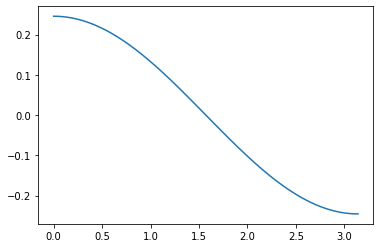

In [6]:
def Func1(x,t):
    return 10*math.e**(-3*t)*np.cos(x)

l = math.pi
a = 1
T = 10
h = 0.005
th = 0.005
x,t,z =diff_scheme(l, T, h, th, Func1, a, U0_x)[0:3]

show(x,z,50) # 3 параметр - момент времени 

точное решение

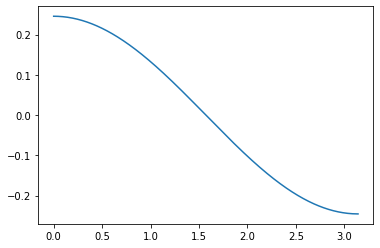

In [7]:
u = lambda x, t: (math.e**(-3*t) + 3*np.sin(t) - np.cos(t))*np.cos(x)
N = int(l/h) +1
M = int(T/th) +1

show_tochn(u,50,N,M)

In [8]:
# вывод решения в виде таблицы
moment = 3
x = diff_scheme(l, T, h, th, Func1, a, U0_x)[0]
xval = np.linspace(0, math.pi, N)
yval = np.linspace(0, 10, M)
x, t = np.meshgrid(xval, yval)
tochn = u(x, t)


for i in range(0,len(x[0]) ,int(len(x[0])/6)):
    print("[",x[moment][i],"] =", z[moment][i], "   ", tochn[moment][i])

[ 0.0 ] = 0.001104544316068842     0.0011082922427250175
[ 0.520263751549902 ] = 0.0009584186321891894     0.0009616519865531266
[ 1.040527503099804 ] = 0.0005586510363325982     0.0005605357208593569
[ 1.5607912546497063 ] = 1.1051076555311206e-05     1.1088358850757223e-05
[ 2.081055006199608 ] = -0.0005394732611695494     -0.0005412932468883637
[ 2.6013187577495103 ] = -0.0009472401308437818     -0.0009504357730275781
[ 3.1215825092994125 ] = -0.0011043447111173446     -0.0011080703667661984


ValueError: operands could not be broadcast together with shapes (315,) (629,) 

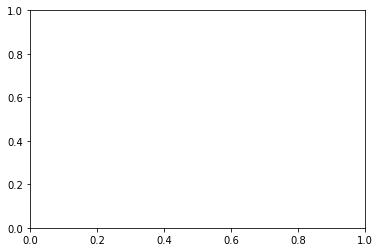

In [18]:
#график погрешности 
moment = 
fig = plt.subplots()
plt.plot(x[moment], z[moment]-tochn[moment])
plt.show()

## Тестовый пример 2

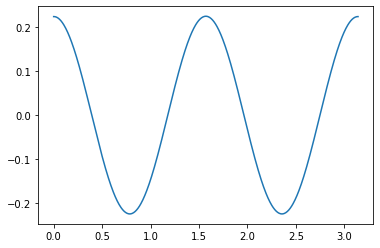

In [20]:
def Func2(x,t):
    return 8*np.cos(2*t)*np.cos(4*x)

l = math.pi
a = 1
T = 5
h = 0.0005
t = 0.0005
x,t,z =diff_scheme(l, T, h, th, Func2, a, U0_x)[0:3]

show(x,z,50)

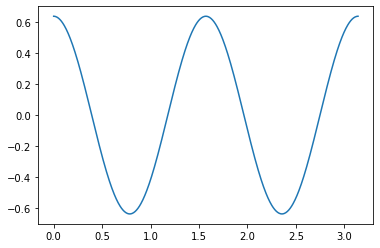

In [11]:
u = lambda x, t: 4/3*((1 + 2 *np.cos(2*t))*np.sin(t)**2)*np.cos(4*x)
N = int(l/h) +1
M = int(T/th)+1 

show_tochn(u,50,N,M)

In [12]:
# вывод решения в виде таблицы
moment = 3
x = diff_scheme(l, T, h, th, Func2, a, U0_x)[0]
z = diff_scheme(l, T, h, th, Func2, a, U0_x)[2]
xval = np.linspace(0, math.pi, N)
yval = np.linspace(0, 10, M)
x, t = np.meshgrid(xval, yval)
tochn = u(x, t)


for i in range(0,len(x[0]),int(len(x[0])/6)):
    print("[",x[moment][i],"] =", z[moment][i], "   ", tochn[moment][i])

[ 0.0 ] = 0.0008994045955218902     0.003594602720891942
[ 0.520263751549902 ] = -0.0004394087449433487     -0.0017556147224140675
[ 1.040527503099804 ] = -0.0004704677030479347     -0.0018797077559250036
[ 1.5607912546497063 ] = 0.0008989644121611912     0.003591724504982192
[ 2.081055006199608 ] = -0.0004076461133934452     -0.0016287102303816797
[ 2.6013187577495103 ] = -0.000500773249589086     -0.0020007906071215797
[ 3.1215825092994125 ] = 0.00089680441979543     0.0035830944664559427


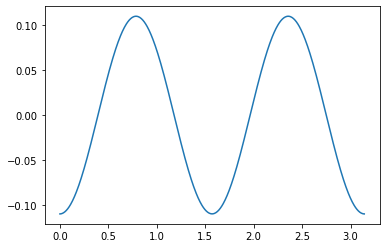

In [13]:
#график погрешности
moment = 20
fig = plt.subplots()
plt.plot(x[moment], (z[moment]-tochn[moment]))
plt.show()

## Моделирование колебаний в зависимости от внешнего сосредоточенного импульса

In [14]:
def Func(x,g,e):
    if (x < (e + g) & (x > (g - e))):
         return 2*e
    else:
        return 0

In [15]:
# входные данные 
l = math.pi
#eps = 0.1*l
eps = 0.01*l

#g = l/4
#g = l/2
g = l/3

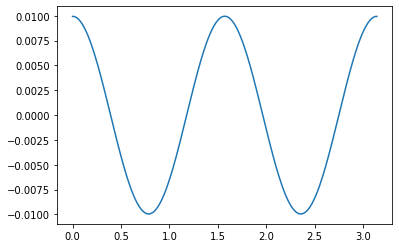

In [16]:
a = 1
T = 5
h = 0.01
t = 0.01
x,t,z =diff_scheme(l, T, h, th, Func2, a, U0_x)[0:3]

show(x,z,10)